In [ ]:
# Import library python
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression

# **TUGAS NOMOR 1**

Dengan dataset berikut: Dataset: House Prices, buatlah notebook pada Google Colab untuk mengeksplor dataset tersebut. Kemudian buatlah model regresi dan buatlah prediksi. Tunjukkan metrik evaluasi yang kamu gunakan untuk memperlihatkan seberapa baik model yang kamu buat.

In [ ]:
# Import dataset
train = pd.read_csv('house_prices_train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Mengambil info dataset 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Melihat jumlah baris dan kolom
train.shape

(1460, 81)

In [ ]:
# Mengecek missing value
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
# Mengurutkan kolom yang memiliki nilai null
data1 = pd.DataFrame(train.isnull().sum().sort_values(ascending=False))
print(data1.to_markdown())

|               |    0 |
|:--------------|-----:|
| PoolQC        | 1453 |
| MiscFeature   | 1406 |
| Alley         | 1369 |
| Fence         | 1179 |
| FireplaceQu   |  690 |
| LotFrontage   |  259 |
| GarageYrBlt   |   81 |
| GarageCond    |   81 |
| GarageType    |   81 |
| GarageFinish  |   81 |
| GarageQual    |   81 |
| BsmtFinType2  |   38 |
| BsmtExposure  |   38 |
| BsmtQual      |   37 |
| BsmtCond      |   37 |
| BsmtFinType1  |   37 |
| MasVnrArea    |    8 |
| MasVnrType    |    8 |
| Electrical    |    1 |
| Id            |    0 |
| Functional    |    0 |
| Fireplaces    |    0 |
| KitchenQual   |    0 |
| KitchenAbvGr  |    0 |
| BedroomAbvGr  |    0 |
| HalfBath      |    0 |
| FullBath      |    0 |
| BsmtHalfBath  |    0 |
| TotRmsAbvGrd  |    0 |
| GarageCars    |    0 |
| GrLivArea     |    0 |
| GarageArea    |    0 |
| PavedDrive    |    0 |
| WoodDeckSF    |    0 |
| OpenPorchSF   |    0 |
| EnclosedPorch |    0 |
| 3SsnPorch     |    0 |
| ScreenPorch   |    0 |


In [ ]:
# Mengubah nilai missing value ke bentuk persen
x= (train.isnull().sum()/train.shape[0])*100
data1 = pd.DataFrame(x.sort_values(ascending=False))
print(data1.to_markdown())

|               |          0 |
|:--------------|-----------:|
| PoolQC        | 99.5205    |
| MiscFeature   | 96.3014    |
| Alley         | 93.7671    |
| Fence         | 80.7534    |
| FireplaceQu   | 47.2603    |
| LotFrontage   | 17.7397    |
| GarageYrBlt   |  5.54795   |
| GarageCond    |  5.54795   |
| GarageType    |  5.54795   |
| GarageFinish  |  5.54795   |
| GarageQual    |  5.54795   |
| BsmtFinType2  |  2.60274   |
| BsmtExposure  |  2.60274   |
| BsmtQual      |  2.53425   |
| BsmtCond      |  2.53425   |
| BsmtFinType1  |  2.53425   |
| MasVnrArea    |  0.547945  |
| MasVnrType    |  0.547945  |
| Electrical    |  0.0684932 |
| Id            |  0         |
| Functional    |  0         |
| Fireplaces    |  0         |
| KitchenQual   |  0         |
| KitchenAbvGr  |  0         |
| BedroomAbvGr  |  0         |
| HalfBath      |  0         |
| FullBath      |  0         |
| BsmtHalfBath  |  0         |
| TotRmsAbvGrd  |  0         |
| GarageCars    |  0         |
| GrLivA

Apabila nilai missing value (null) pada kolom lebih dari 50%, maka akan dilakukan drop. Kolom tersebut adalah
*   PoolQC
*   MiscFeature
*   Alley
*   Fence







In [ ]:
# Menghapus kolom yang mengandung missing value
train = train.drop(columns='PoolQC',axis=1)
train = train.drop(columns='MiscFeature',axis=1)
train = train.drop(columns='Alley',axis=1)
train = train.drop(columns='Fence',axis=1)

In [ ]:
# Menghapus nilai missing value pada kolom 
train = train.dropna()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 1 to 1457
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             583 non-null    int64  
 1   MSSubClass     583 non-null    int64  
 2   MSZoning       583 non-null    object 
 3   LotFrontage    583 non-null    float64
 4   LotArea        583 non-null    int64  
 5   Street         583 non-null    object 
 6   LotShape       583 non-null    object 
 7   LandContour    583 non-null    object 
 8   Utilities      583 non-null    object 
 9   LotConfig      583 non-null    object 
 10  LandSlope      583 non-null    object 
 11  Neighborhood   583 non-null    object 
 12  Condition1     583 non-null    object 
 13  Condition2     583 non-null    object 
 14  BldgType       583 non-null    object 
 15  HouseStyle     583 non-null    object 
 16  OverallQual    583 non-null    int64  
 17  OverallCond    583 non-null    int64  
 18  YearBuilt

In [ ]:
# Melakukan Split Data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
test = pd.read_csv('house_prices_test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
# Melihat korelasi antar kolom dari dataset
corr=train.corr()
# Memisahkan variabel x dan y
X=train[corr.index[abs(corr['SalePrice'])>0.50].drop('SalePrice')] # Menghilangkan fitur yang sangat berkorelasi
y=train[['SalePrice']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
print( X_train.shape, X_test.shape)

(466, 9) (117, 9)


In [ ]:
# Melakukan scalling pada X train dan X test
scaler = StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
# Menampilkan regresi linier 
linreg = LinearRegression()
linreg.fit(X_train,y_train)
linregpred = linreg.predict(X_test)

Text(0, 0.5, 'Y Predicted')

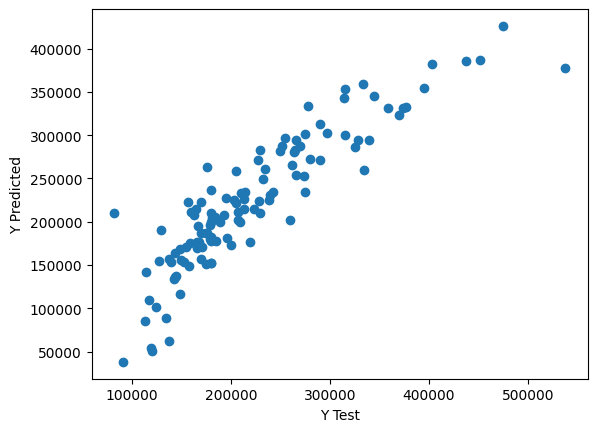

In [ ]:
# Membuat plot dari prediksi regresi linier
plt.scatter(y_test,linregpred)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

In [ ]:
# Evaluasi Model
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, linregpred))
print('MSE:', metrics.mean_squared_error(y_test, linregpred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, linregpred)))

from sklearn.metrics import r2_score
print('R-squared :{}'.format(r2_score(y_test, linregpred)))

MAE: 28544.728093725662
MSE: 1423377645.900929
RMSE: 37727.67745171877
R-squared :0.8026486869736327


MAE dan RMSE memiliki perbedaan yang tidak terlalu jauh, sehingga dapat dikatakan bahwa pesebaran erornya kecil. Namun, hasil prediksi belum dapat dikatakan paling baik karena nilai MAE dan RMSE jauh dari nilai 0 (nol).

#**TUGAS NOMOR 2**

Buatlah penyelesaian masalah untuk model clustering untuk dataset berikut: Dataset: Popular Unsupervised Clustering AlgorithmsLinks to an external site. atau File Dataset Download File Dataset(kedua dataset sama). Tugas harus memiliki komponen minimal sbg berikut :
*   Analisis data eksploratif (EDA) antar variabel
*   Pembuatan clustering model (model training)
*   Tampilan ukuran evaluasi model (Evaluation Metrics)


##**EDA**

###Load Data

In [ ]:
# Mengambil dataset
data2 = pd.read_csv('Mall_Customers.csv')
data2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Mengambil info data
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Mengecek Missing Value
data2.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# Melihat basic statistics
data2.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# Melakukan Label Encoding
data2['Gender'] = data2['Gender'].astype('category').cat.codes
data2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
# Mengubah tipe data "Gender" dari integer ke object menggunakan astype
data2['Gender']=data2['Gender'].astype(object)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


###Statistical Summary

In [ ]:
# Variabel dipisah menjadi dua, yaitu categorical dan numeric menggunakan list comprehension
cats=[i for i in data2.columns if data2[i].dtypes == 'object' and i not in ['customerID']]
nums=[i for i in data2.columns if data2[i].dtypes != 'object']

In [ ]:
# Mengecek unique value dari kolom 
data2[cats].value_counts()

Gender
0         112
1          88
dtype: int64

In [ ]:
# Melakukan pendekatan numerik
data2[nums].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# Melakukan pendekatan categorical
data2[cats].describe()

,Gender
count,200
unique,2
top,0
freq,112


###Plotting

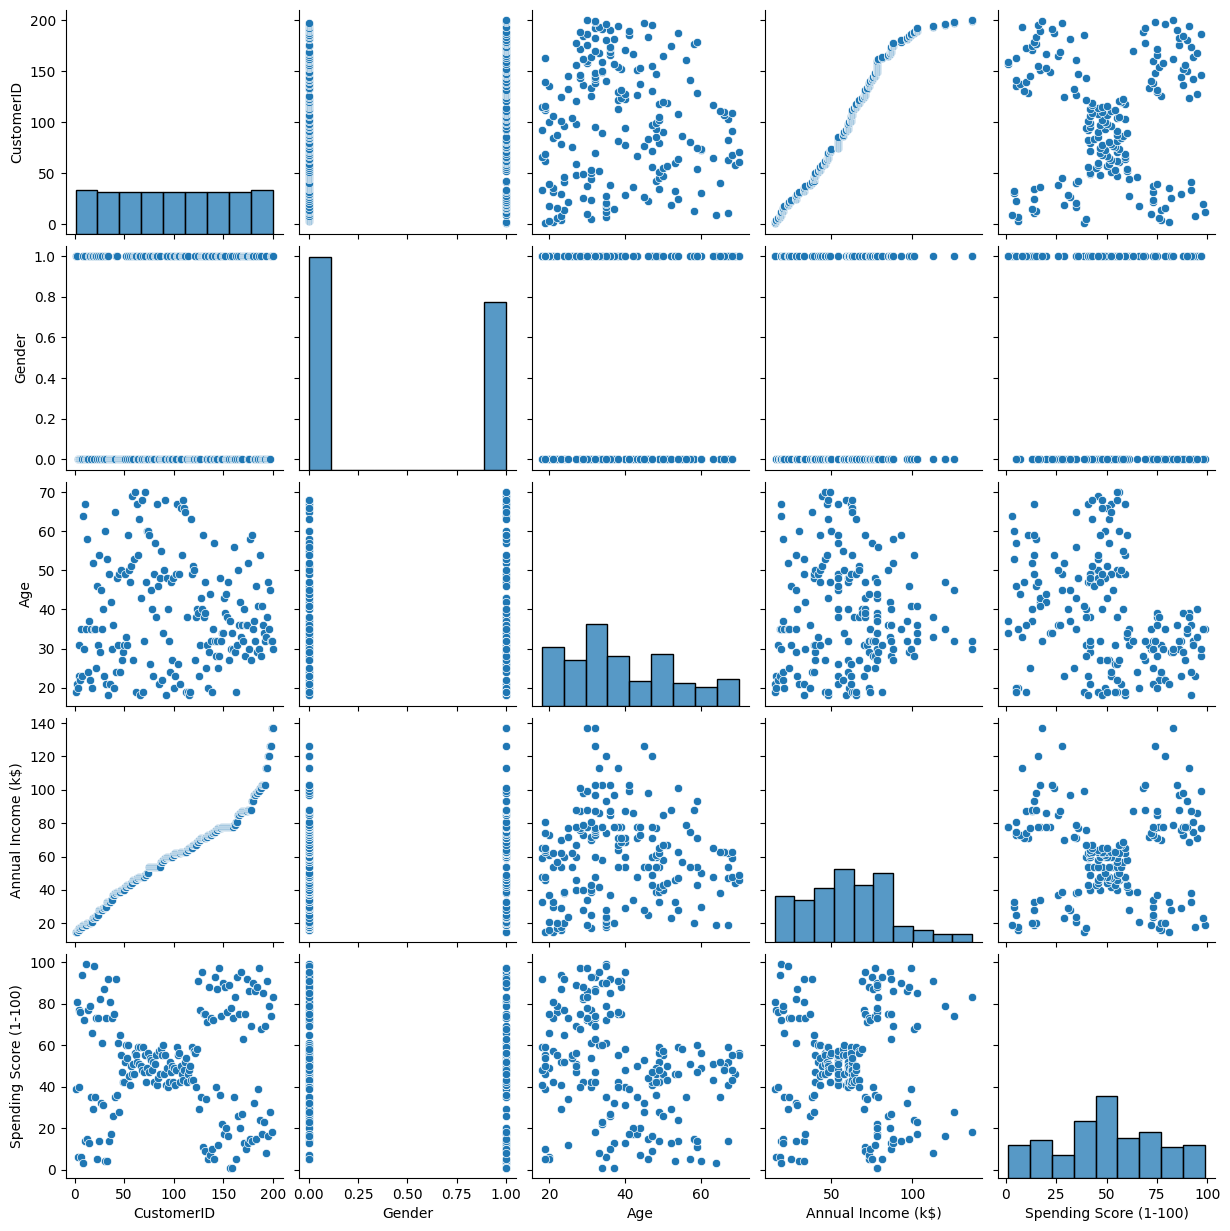

In [ ]:
sns.pairplot(data2)

Visualisasi di atas menghasilkan informasi sebagai berikut:
- Pelanggan Mall dengan rentang umur yang lebih muda
- Pelanggan mall memiliki rata-rata Annual Income dari penghasilan di bawah 100K$
- Spending Score pelanggan memiliki normal distribusi, yaitu mendekati nilai 50
- Hubungan antara kolom Annual Income dan Spending Score membentuk suatu kluster yang dapat dilihat secara langsung.

##**MODEL TRAINING**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
labeler = LabelEncoder()



Model K-Means bekerja berdasarkan jarak dari suatu data, sehingga akan lebih baik apabila skala dari data numerik disamakan. Data akan distandarisasikan (data menjadi Z-score, sehingga data memiliki mean 0 dan standar deviasi 1).

In [ ]:
scaler = StandardScaler()
data2 = pd.DataFrame(scaler.fit_transform(data2), columns = data2.columns)
data2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980


###Elbow Analysis

In [ ]:
# Melihat iterasi dari metode Elbow
inertia_list = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data2)
    inertia_list.append(kmeans.inertia_)
    print('iterasi ke- ',i, 'dengan : ',kmeans.inertia_)

iterasi ke-  1 dengan :  1000.0000000000002
iterasi ke-  2 dengan :  715.275047376112
iterasi ke-  3 dengan :  573.7345467939024
iterasi ke-  4 dengan :  458.18341928673993
iterasi ke-  5 dengan :  394.92455170715846
iterasi ke-  6 dengan :  334.941006441632
iterasi ke-  7 dengan :  295.1696424913296
iterasi ke-  8 dengan :  254.52154082454064
iterasi ke-  9 dengan :  222.7096456238639
iterasi ke-  10 dengan :  190.3425217871548


Text(0, 0.5, 'Inertia')

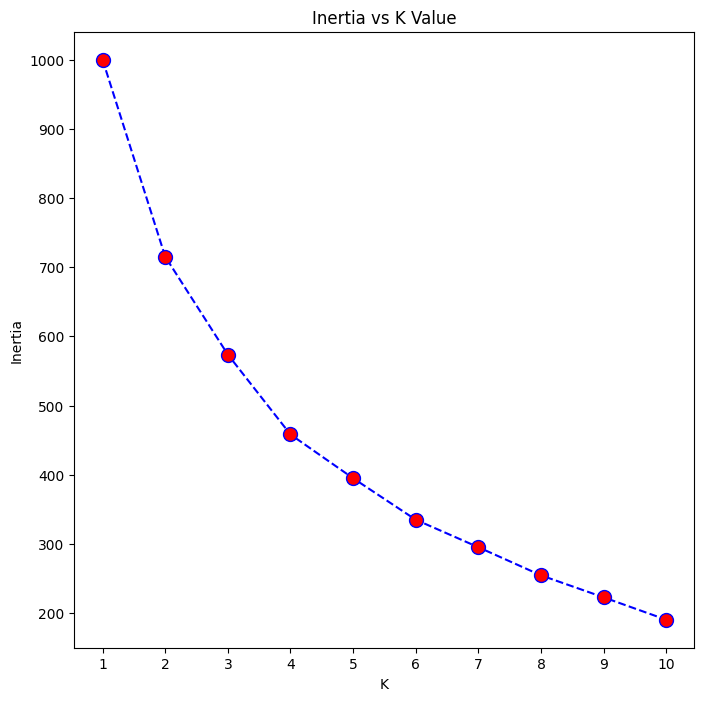

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(range(1,11), inertia_list, color = 'blue', linestyle = 'dashed', marker ='o', markerfacecolor = 'red',
         markersize = 10)
plt.title('Inertia vs K Value')
plt.xticks(range(1,11, 1))
plt.xlabel('K')
plt.ylabel('Inertia')

Berdasarkan Elbow Analysis, diperoleh bahwa cluster 5 adalah kandidat yang optimal

###KMeans Graphic

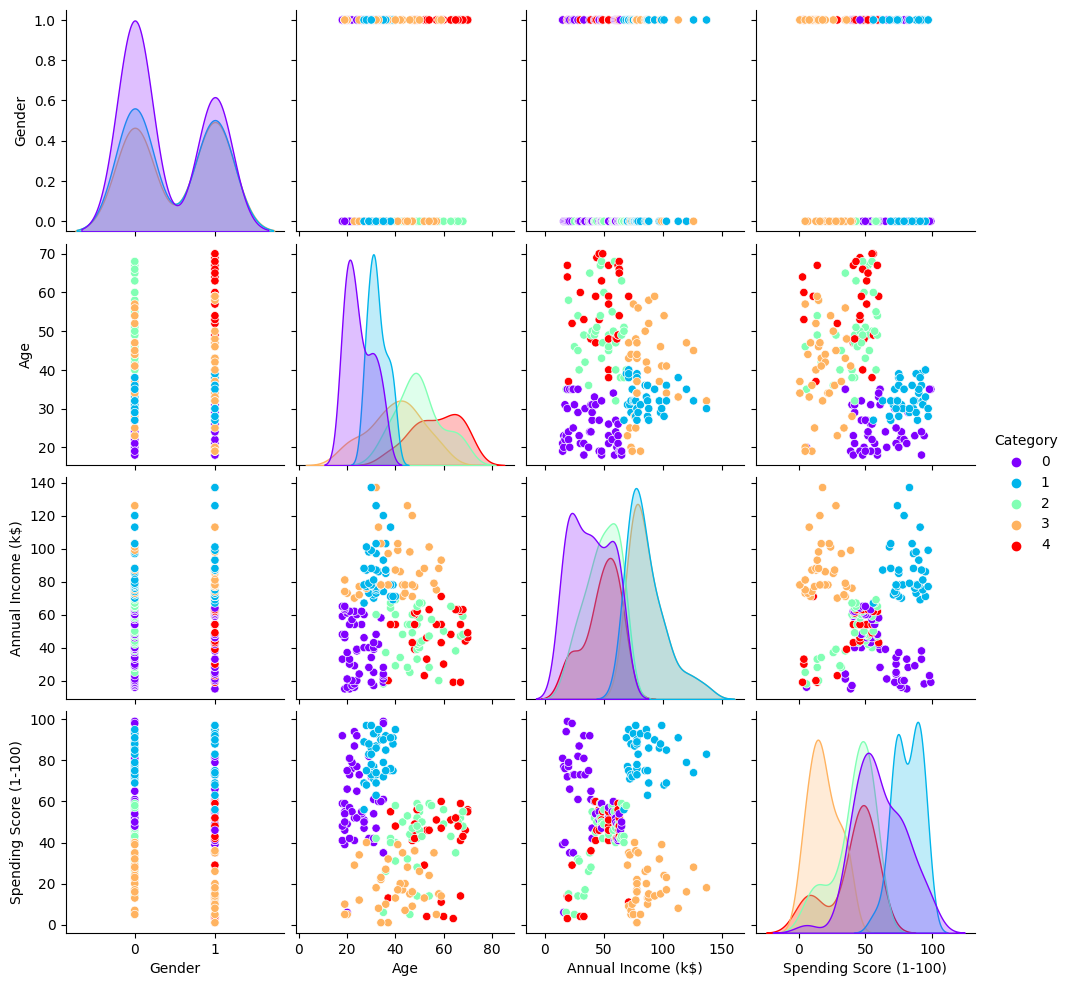

In [ ]:
km = KMeans(n_clusters =5).fit(data2) 
# Membaca kembali data original ke variabel yang lain
data2_ori = pd.read_csv('Mall_Customers.csv')
data2_ori.drop('CustomerID', axis = 1, inplace = True)
data2_ori['Gender'] = labeler.fit_transform(data2_ori['Gender'])
# Membuat satu kolom kategori untuk menempatkan hasil kluster 
data2_ori['Category'] = km.labels_
sns.pairplot(data = data2_ori, hue = 'Category', palette = 'rainbow')

Dengan melihat plot diatas, dapat diambil kesimpulan dari pembagian data sebagai berikut:

- Label 0 merepresentasikan Pelanggan Female dengan rentang umur beragam yang memiliki Annual Income dibawah 100K $ dan spending score rendah hingga menengah.
- Label 1 merepresentasikan pelanggan Male yang masih muda dengan Annual Income beragam dan Spending score menengah hingga tinggi.
- Label 2 merepresentasikan pelanggan Female yang masih muda dengan Annual Income beragam dan Spending score menengah hingga tinggi.
- Label 3 merepresentasikan pelanggan Male dengan rentang umur yang lebih tua, memiliki Annual income yang lebih rendah, dan spending score yang lebih rendah juga.
- Label 4 merepresentasikan pelanggan baik Female ataupun Male, dengan Annual Income menengah hingga tinggi, dan spending score rendah hingga menengah.

##**EVALUATION MATRICS**

Tidak ada syarat yang mutlak untuk menggunakan seluruh data dalam membuat kluster. Jika dilihat dari data di atas akan mudah untuk K-Means membagi data dengan menggunakan kolom gender karena kolom tersebut hanya memiliki 2 nilai (0 (Female) dan 1 (Male)). Oleh karena itu, dapat dicoba melatih ulang K-Means model dengan data mall, tetapi tanpa data gender. 

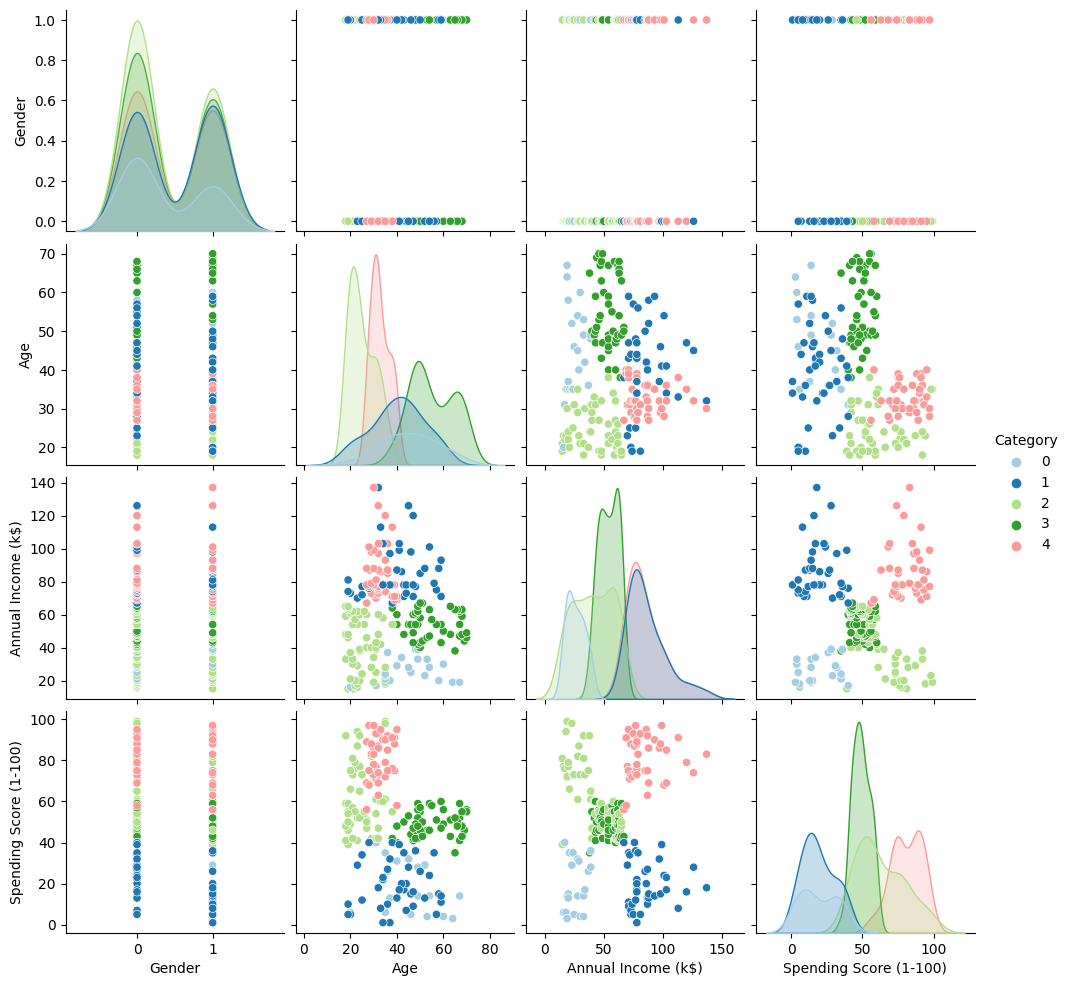

In [ ]:
km = KMeans(n_clusters =5).fit(data2.drop('Gender', axis = 1))
data2_ori['Category'] = km.labels_
sns.pairplot(data = data2_ori, hue = 'Category', palette = 'Paired')

Tanpa menggunakan data gender, data yang dipunya tidak terpisah sama sekali berdasarkan gender. Jadi, hasil kluster di atas dapat diambil kesimpulan sebagai berikut:
- Label 0 merepresentasikan pelanggan dengan annual income sangat rendah, spending score rendah, dan rentang umur yang beragam.
- Label 1 merepresentasikan pelanggan dengan annual income agak rendah, spending score agak rendah, dan memiliki rentang umur menengah hinnga tua.
- Label 2 merepresentasikan pelanggan dengan rentang umur menengah ke arah muda, annual income menengah hingga tinggi, dan spending score yang tinggi.
- Label 3 merepresentasikan pelanggan dengan rentang umur muda, annual income yang rendah, dan spending score yang menengah hingga tinggi.
- Label 4 merepresentasikan pelanggan dengan umur yang beragam, annual income menengah hingga tinggi, dan spending score yang rendah.